# Visualisation of Pokemon

The goal this week is to look at some more visualisation methods.

We will follow examples from [this Python Seaborn tutorial](https://elitedatascience.com/python-seaborn-tutorial) by EliteDataScience.   [Seaborn](https://seaborn.pydata.org/) is a Python library that sits on top of matplotlib and Pandas and gives us a richer collection of plots than the basic plot method.   Unfortunately (for us), there has just (July 2018) been a new release of Seaborn that is incompatible with the version installed in Anaconda; the official tutorial and documentation refer to the new version so it is a bit hard to find help.  Luckily the tutorial I've linked above is a pretty good walk through of the major plot styles so should be useful.  You can find documentation and examples of the older version of Seaborn via the [archive](https://seaborn.pydata.org/archive.html).  Check your Seaborn version below.

I've downloaded the Pokemon dataset from the tutorial and included it in this repository.   I had to edit the file a little since it had some unicode characters in that blocked the load.  The first few cells here import this file.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [3]:
# see what version of Seaborn you have installed so you can find the right documentation
sns.__version__

'0.10.1'

In [4]:
# Read dataset
df = pd.read_csv('files/Pokemon.csv', index_col=0)

In [5]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [6]:
df.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage
count,151.00000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,407.07947,64.211921,72.549669,68.225166,67.139073,66.019868,68.933775,1.582781
std,99.74384,28.590117,26.596162,26.916704,28.534199,24.197926,26.746880,0.676832
min,195.00000,10.000000,5.000000,5.000000,15.000000,20.000000,15.000000,1.000000
25%,320.00000,45.000000,51.000000,50.000000,45.000000,49.000000,46.500000,1.000000
50%,405.00000,60.000000,70.000000,65.000000,65.000000,65.000000,70.000000,1.000000
75%,490.00000,80.000000,90.000000,84.000000,87.500000,80.000000,90.000000,2.000000
max,680.00000,250.000000,134.000000,180.000000,154.000000,125.000000,140.000000,3.000000


We can see that the data has 151 entries for different Pokemon.  `Stage` is an integer field that varies between 1 and 3.  `Speed` also seems to be an integer ranging from 15 to 140.  I'm guessing that the `Sp.Atk` and `Sp.Def` fields represent speed of attack and defense.  The three columns `HP`, `Attack` and `Defense` fields describe the power of the Pokemon in some way. (This is all based on my limited knowledge of Pokemon from when my kids were small many years ago!)

We can now explore the data using Seaborn graphics.

The first plot looks at the relationship between the `Attack` and `Defense` fields using an `lmplot` which shows the line of best fit between the variables. 

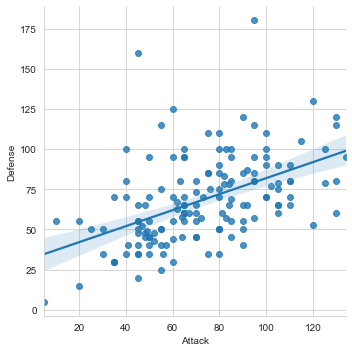

In [45]:
sns.lmplot(x='Attack', y='Defense', data=df)

From this plot it seems that the two variables are correlated to some degree - higher `Attack` values mean higher `Defense` values. 

We can also use `lmplot` to add a third variable using the colour or hue of the points. Here I remove the line of best fit for clarity.

(0.0, 140.45)

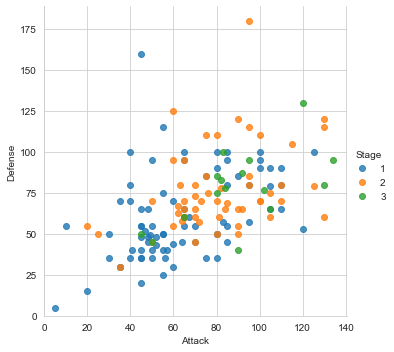

In [46]:
sns.lmplot(x='Attack', y='Defense', data=df, fit_reg=False, hue='Stage')
plt.ylim(0, None)
plt.xlim(0, None)

From this plot we can see that later stage Pokemon (green) cluster to the top right of the graph meaning they are better at attack and defense. 

The next plot looks at the distributions of the different variables using a boxplot which shows the mean of each column and the variance via the height of the box.

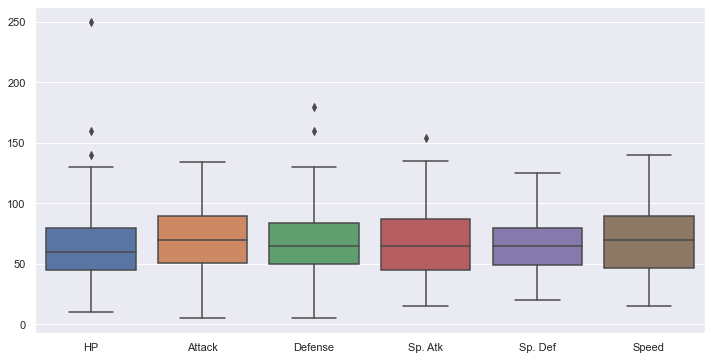

In [14]:
plt.figure(figsize=(12,6))
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
sns.boxplot(data=stats_df)

This is a good way to visualise the data I showed earlier from `df.describe()`. 

Next is a plot of the `Attack` variable for each of the different Pokemon types in the `Type 1` field.  We define a special colour pallete to match the colours of the Pokemon in the show. 

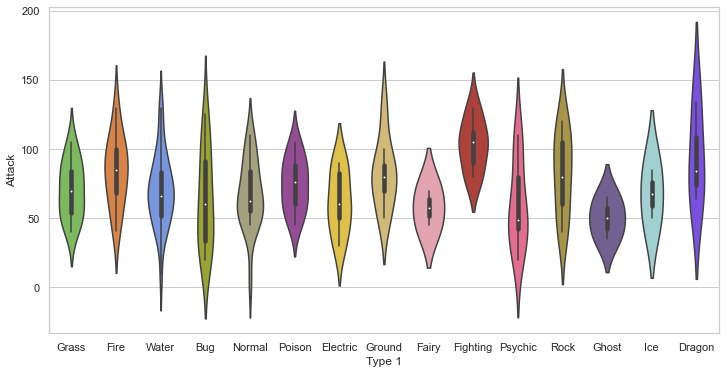

In [15]:

# Set theme
sns.set_style('whitegrid')
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
# Violin plot
sns.violinplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors)

This figure shows the different distributions of the attack strength of different types.  For example Fairy pokemon are clustered around the mean closely where Bug and Dragon Pokemon have a broader distribution.  

Using the same data, a `swarmplot` shows how the individual points contribute to this spread.

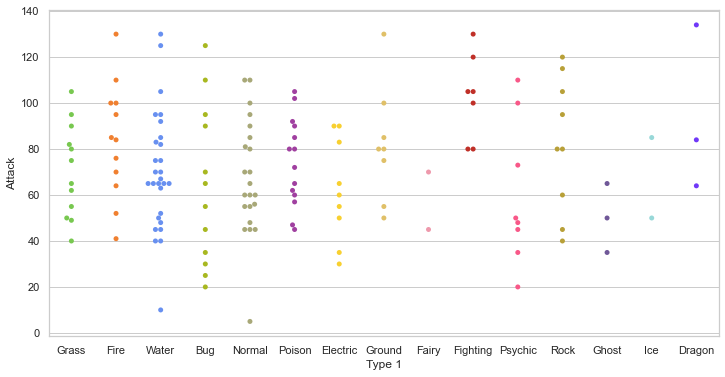

In [16]:
sns.swarmplot(x='Type 1', y='Attack', data=df, palette=pkmn_type_colors)

This plot shows that the distribution of the Dragon type is actually based on just three examples and there are only two Fairy Pokemon.  This is quite a bit more informative than the previous plot.

The next figure combines both of these plots together.

Text(0.5, 1.0, 'Attack by Type')

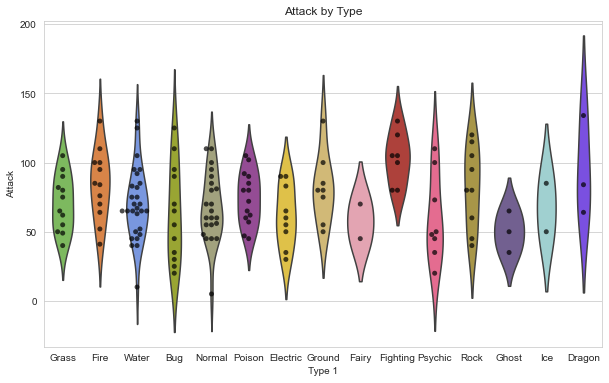

In [50]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')

In this next plot we try to show many variables together.  To do this we use `melt()` which combines three columns (`Name`, `Type 1` and `Type 2`) into a single column called `Stat`.  We then plot this new variable in a `swarmplot`.

In [51]:
melted_df = pd.melt(stats_df, 
                    id_vars=["Name", "Type 1", "Type 2"], # Variables to keep
                    var_name="Stat") # Name of melted variable
melted_df.head()

,Name,Type 1,Type 2,Stat,value
0,Bulbasaur,Grass,Poison,HP,45
1,Ivysaur,Grass,Poison,HP,60
2,Venusaur,Grass,Poison,HP,80
3,Charmander,Fire,NaN,HP,39
4,Charmeleon,Fire,NaN,HP,58


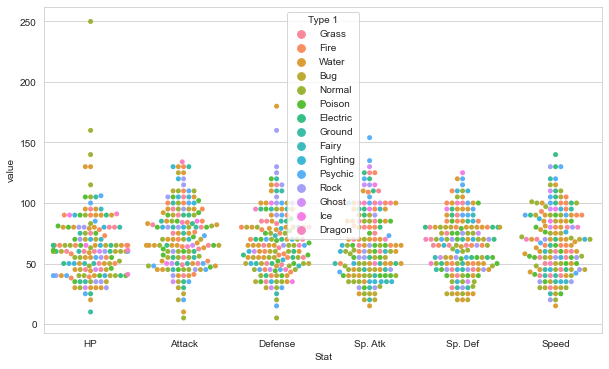

In [52]:
plt.figure(figsize=(10,6))

# Swarmplot with melted_df
sns.swarmplot(x='Stat', y='value', data=melted_df, hue='Type 1')

This is an interesting plot but a little hard to interpret!  The next version splits the different points out by colour and is a little better.

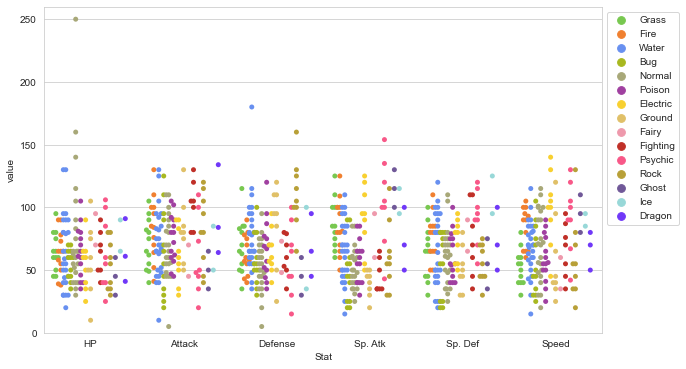

In [53]:
# 1. Enlarge the plot
plt.figure(figsize=(10,6))
 
sns.swarmplot(x='Stat', 
              y='value', 
              data=melted_df, 
              hue='Type 1', 
              dodge=True, # 2. Separate points by hue
              palette=pkmn_type_colors) # 3. Use Pokemon palette
 
# 4. Adjust the y-axis
plt.ylim(0, 260)
 
# 5. Place legend to the right
plt.legend(bbox_to_anchor=(1, 1), loc=2)

This plot un-jumbles the points but it doesn't really tell much of a story since most of the types are distributed in a very similar manner, no group really stands out here. 

Next is a heatmap of the correlation matrix between the data colums:

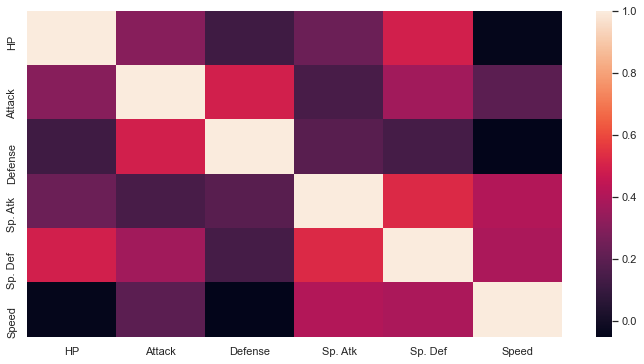

In [17]:
sns.heatmap(stats_df.corr())

This shows that all correlations are zero or positive with the highest correlations between eg. Speed and Sp. Atk and Sp. Def and maybe Attack and Defense. 

The `distplot` function can be used to show the distribution of a single variable overlaid with a probability distribution curve. 

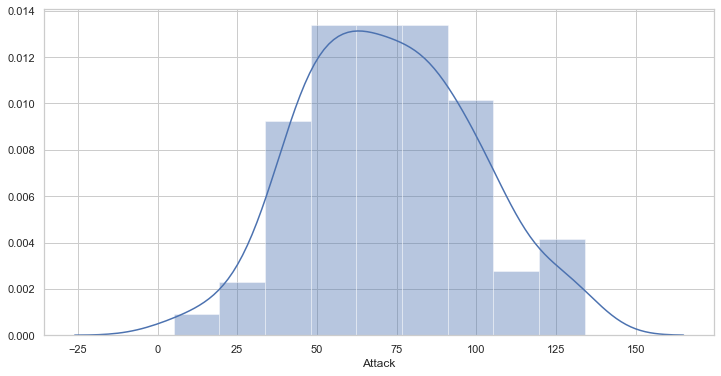

In [18]:
sns.distplot(df.Attack)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

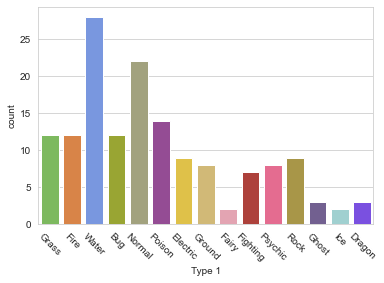

In [60]:
sns.countplot(x='Type 1', data=df, palette=pkmn_type_colors)
plt.xticks(rotation=-45)

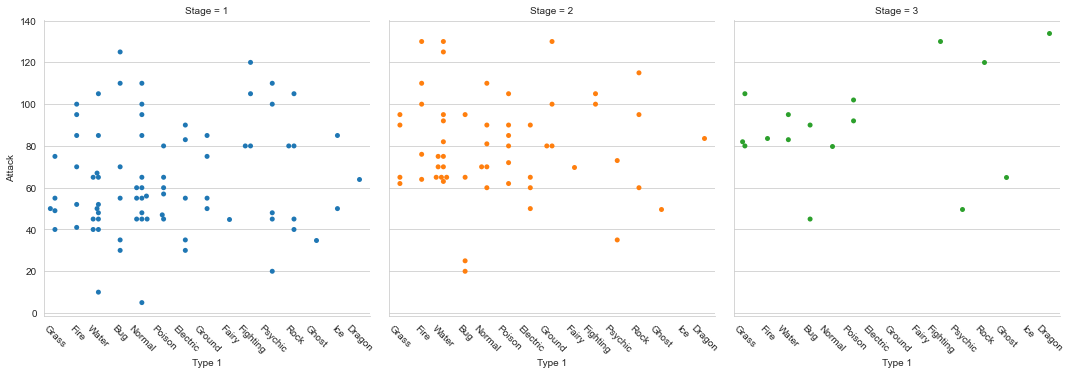

In [63]:
# Factor Plot
g = sns.factorplot(x='Type 1', 
                   y='Attack', 
                   data=df, 
                   hue='Stage',  # Color by stage
                   col='Stage',  # Separate by stage
                   kind='swarm') # Swarmplot
 
# Rotate x-axis labels
g.set_xticklabels(rotation=-45)


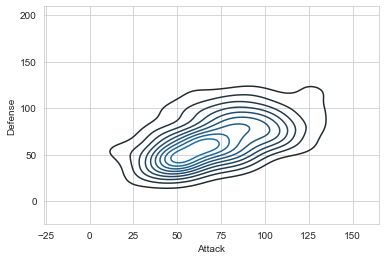

In [65]:
# density plot shows the co-distribution of two variables as a 'contour' plot.
sns.kdeplot(df.Attack, df.Defense)

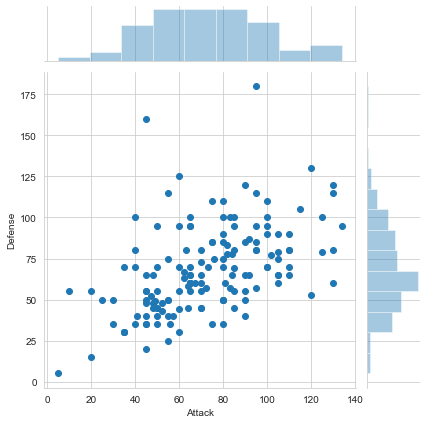

In [68]:
# Joint distribution plot shows histogram of the two variables aligned with a scatter plot
sns.jointplot(x='Attack', y='Defense', data=df)

## Plot Size and Title

One thing you may want to do is to change the plot size which by default can be a bit small.  You should also add titles to your plots and make sure they have good X and Y axis labels.  Here's an example of how you can do this.  Play around with these settings to see their effect.  (Note that I get a warning about deprecated arguements when running this, that's ok).

You might also want to experiment with different figure styles to find something you like.  Here is the [Seaborn documentation](https://seaborn.pydata.org/archive/0.10/tutorial/aesthetics.html#seaborn-figure-styles) on that for version 0.10.

Text(0.5, 1.0, 'Distribution of Speed for Pokemon')

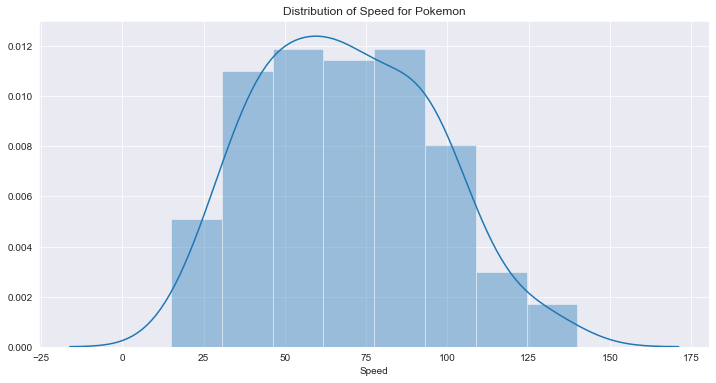

In [54]:
plt.figure(figsize=(12,6))
with sns.axes_style('darkgrid'):
    sns.distplot(df.Speed)
plt.title("Distribution of Speed for Pokemon")